<a href="https://colab.research.google.com/github/roszcz/matplotlib-cinematic-universe/blob/master/MCU_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/roszcz/matplotlib-cinematic-universe
!pip install -U matplotlib
!cd ./matplotlib-cinematic-universe

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

In [2]:
cd ./matplotlib-cinematic-universe/

/content/matplotlib-cinematic-universe


In [3]:
from mcu import squiggle

Rendering to: tmp/scenes/WAVY-JUWNLVTJBCVPPMUM


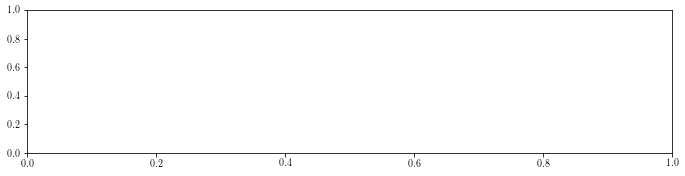

In [4]:
w = squiggle.WavyScene()
content_dir = w.render()

In [5]:
content_dir

PosixPath('tmp/scenes/WAVY-JUWNLVTJBCVPPMUM')

In [6]:
import subprocess
from pathlib import Path

def ffmpeg_movie(movie_dir: Path, framerate: int = 30) -> None:
    image_pattern = movie_dir / '*png'
    savepath = movie_dir.with_suffix('.mp4')

    # It's a lengthy command, but there's no need to grok it
    command = f"""
        ffmpeg -y -framerate {framerate} -f image2 -pattern_type glob \
        -i '{image_pattern}' -c:v libx264 -r 30 -profile:v high -crf 20 \
        -pix_fmt yuv420p {savepath}
    """
    subprocess.call(command, shell=True)

In [7]:
ffmpeg_movie(content_dir)

In [11]:
ls tmp/scenes

WAVY-BHNAUFHWFUZOWWJU/  WAVY-JUWNLVTJBCVPPMUM.mp4
WAVY-JUWNLVTJBCVPPMUM/  WAVY-RRCQIRFGSYBKDPFL/


In [12]:
from IPython.display import HTML
from base64 import b64encode

video_bytes = open('tmp/scenes/WAVY-JUWNLVTJBCVPPMUM.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(video_bytes).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)